In [1]:
# discliamer
# - this wasn't built to run on series of different lengths and not aligned in time.
# - for example, run this on departments instead of SKUs -- it may "Just Work" on irregular series data
# - if you have varied length series, maybe start at the most recent data, and move back 1 year and truncate your data
# - this is a quick sample script and is not robust, please modify based on needs

# MC - This is what Bill got from Justin Swansburg to pass the time series demo cert

In [2]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os
cwd = os.getcwd()
cwd


'/Users/matthew.cohen/Dev/DataRobot-my github repo/Bill Garvert'

These are the inputs

In [3]:
date_col = "Date"
target = "Sales"
series_id = "Department" # THIS needs to be a single column

In [82]:
d = pd.read_excel("./data/time_series_poc_certification_training.csv.xlsx", parse_dates=[date_col])
d.sort_values(by=date_col, ascending=True, inplace=True)
d.shape

(18000, 14)

In [5]:
d.head(8)


,Department,Date,Sales,Department_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Athletic Clothing,2012-04-01,80874,2060,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
1484,Beauty,2012-04-01,41834,1890,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
2224,Beverages,2012-04-01,22954,2050,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
3731,"Camera, Photo, and Video",2012-04-01,54724,1952,17,0.811287,158,8.713822,In Store Credit Card Signup Discount; Spring P...,No,0.030232,0.780263,NaN,-0.025092
5251,Childrens Fashion,2012-04-01,41811,1940,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
5985,Computer Parts and Components,2012-04-01,31417,1801,10,0.744965,81,9.795283,In Store Credit Card Signup Discount; Spring P...,No,0.030387,0.780263,NaN,-0.025092
6751,Computers and Tablets,2012-04-01,19552,1569,6,0.735032,64,8.979314,In Store Credit Card Signup Discount; Spring P...,No,0.029981,0.780263,NaN,-0.025092
7501,"Dairy, Cheese, and Eggs",2012-04-01,23529,2050,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092


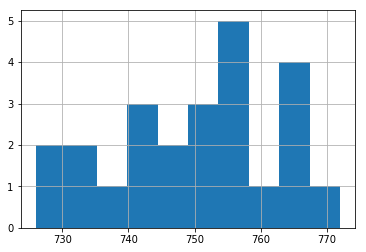

In [6]:
# Check to see if your series are similar lengths
d.groupby(series_id).count()[date_col].hist()
plt.show()

In [7]:
d[series_id].value_counts()

Camera, Photo, and Video           772
Headphones                         767
Computer Parts and Components      766
Pet Supplies                       763
Toys and Games                     763
Mens Fashion                       759
Bathing Suits                      758
Fruit and Vegetables               758
Bluetooth and Wireless Speakers    755
Video Games                        755
Electronics                        754
Beverages                          752
Computers and Tablets              750
Meat and Seafood                   750
Cell Phones and Accessories        748
Sports Equipment                   746
Womens Fashion                     742
Lawn and Garden                    740
Beauty                             740
Snack Foods                        739
Childrens Fashion                  734
Dairy, Cheese, and Eggs            734
TV and Video                       729
Athletic Clothing                  726
Name: Department, dtype: int64

In [59]:
# get the time step between dates for each series
t = d.copy()
t['diff'] = d.groupby(series_id)['Date'].diff().dt.days

# Make sure 'Date' is a datetime
d['Date'] = pd.to_datetime(d['Date'])

# shows that there are non-sequential dates for the index
# t['diff']

# shows the missing dates and the number of days between steps
t[t[series_id] == 'Athletic Clothing'][[date_col, series_id, 'diff']].head(10)

,Date,Department,diff
0,2012-04-01,Athletic Clothing,NaN
1,2012-04-02,Athletic Clothing,1.0
2,2012-04-03,Athletic Clothing,1.0
3,2012-04-04,Athletic Clothing,1.0
4,2012-04-05,Athletic Clothing,1.0
5,2012-04-06,Athletic Clothing,1.0
6,2012-04-07,Athletic Clothing,1.0
7,2012-04-09,Athletic Clothing,2.0
8,2012-04-11,Athletic Clothing,2.0
9,2012-04-12,Athletic Clothing,1.0


In [60]:
# Same thing as above, but for the full orig dataframe
d[d[series_id] == 'Athletic Clothing'].set_index([date_col])

,Department,Sales,Department_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
Date,,,,,,,,,,,,,
2012-04-01,Athletic Clothing,80874,2060,31,0.760756,371,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
2012-04-02,Athletic Clothing,80532,2060,33,0.781784,308,5.835458,In Store Credit Card Signup Discount; Spring P...,No,0.028092,NaN,NaN,NaN
2012-04-03,Athletic Clothing,82474,2060,65,0.444975,386,6.180215,In Store Credit Card Signup Discount; Spring P...,No,0.029847,NaN,NaN,NaN
2012-04-04,Athletic Clothing,83639,2060,67,0.836780,364,7.149818,In Store Credit Card Signup Discount; Spring P...,No,0.028064,NaN,NaN,NaN
2012-04-05,Athletic Clothing,81763,2060,65,0.991318,567,10.323724,In Store Credit Card Signup Discount; Spring P...,No,0.030224,NaN,NaN,NaN
2012-04-06,Athletic Clothing,81082,2060,65,0.605925,709,8.392068,In Store Credit Card Signup Discount; Spring P...,No,0.030482,NaN,4300.0,NaN
2012-04-07,Athletic Clothing,82190,2060,68,0.342021,491,9.113846,In Store Credit Card Signup Discount; Spring P...,No,0.038417,NaN,NaN,NaN
2012-04-09,Athletic Clothing,80984,2060,45,0.059526,223,10.039990,In Store Credit Card Signup Discount; Spring P...,No,0.037888,NaN,NaN,NaN
2012-04-11,Athletic Clothing,83559,2060,70,0.512851,293,6.628363,In Store Credit Card Signup Discount; Spring P...,No,0.036955,NaN,NaN,NaN


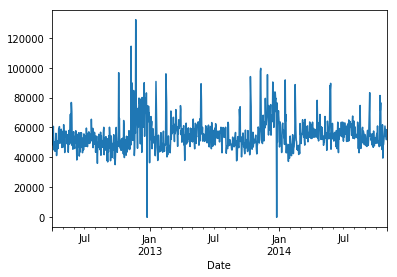

In [61]:
d.groupby(date_col).mean()[target].plot()
plt.show()

In [20]:
d.groupby([date_col,series_id]).max()[target]

Date        Department                     
2012-04-01  Athletic Clothing                   80874
            Bathing Suits                       81787
            Beauty                              41834
            Beverages                           22954
            Camera, Photo, and Video            54724
            Childrens Fashion                   41811
            Computer Parts and Components       31417
            Computers and Tablets               19552
            Dairy, Cheese, and Eggs             23529
            Electronics                         36395
            Meat and Seafood                    22792
            Mens Fashion                        40671
            TV and Video                       160857
            Toys and Games                      66903
            Video Games                        181214
            Womens Fashion                      40202
2012-04-02  Athletic Clothing                   80532
            Bathing Suits             

In [21]:
d.groupby([date_col,series_id]).mean()[target]

Date        Department                     
2012-04-01  Athletic Clothing                   80874
            Bathing Suits                       81787
            Beauty                              41834
            Beverages                           22954
            Camera, Photo, and Video            54724
            Childrens Fashion                   41811
            Computer Parts and Components       31417
            Computers and Tablets               19552
            Dairy, Cheese, and Eggs             23529
            Electronics                         36395
            Meat and Seafood                    22792
            Mens Fashion                        40671
            TV and Video                       160857
            Toys and Games                      66903
            Video Games                        181214
            Womens Fashion                      40202
2012-04-02  Athletic Clothing                   80532
            Bathing Suits             

In [63]:
d.groupby([date_col,series_id]).mean()[target].unstack().head(10)

Department,Athletic Clothing,Bathing Suits,Beauty,Beverages,Bluetooth and Wireless Speakers,"Camera, Photo, and Video",Cell Phones and Accessories,Childrens Fashion,Computer Parts and Components,Computers and Tablets,...,Lawn and Garden,Meat and Seafood,Mens Fashion,Pet Supplies,Snack Foods,Sports Equipment,TV and Video,Toys and Games,Video Games,Womens Fashion
Date,,,,,,,,,,,,,,,,,,,,,
2012-04-01,80874.0,81787.0,41834.0,22954.0,NaN,54724.0,NaN,41811.0,31417.0,19552.0,...,NaN,22792.0,40671.0,NaN,NaN,NaN,160857.0,66903.0,181214.0,40202.0
2012-04-02,80532.0,82971.0,41283.0,15622.0,37174.0,57193.0,NaN,40132.0,31160.0,26332.0,...,80545.0,15673.0,41648.0,NaN,15468.0,83173.0,NaN,60738.0,177219.0,40791.0
2012-04-03,82474.0,80946.0,42028.0,NaN,36839.0,59870.0,34870.0,40561.0,26408.0,24684.0,...,80199.0,15310.0,41568.0,40832.0,15730.0,83159.0,151164.0,66067.0,192251.0,40377.0
2012-04-04,83639.0,82389.0,40323.0,20410.0,36290.0,60162.0,34728.0,NaN,NaN,22903.0,...,81618.0,20052.0,41690.0,41469.0,NaN,NaN,132525.0,49522.0,191147.0,NaN
2012-04-05,81763.0,83932.0,41763.0,18220.0,45313.0,73095.0,38665.0,40268.0,40707.0,NaN,...,83758.0,NaN,40168.0,40107.0,NaN,81778.0,NaN,83495.0,218827.0,NaN
2012-04-06,81082.0,80392.0,40113.0,17929.0,48273.0,74305.0,41590.0,41152.0,NaN,33335.0,...,80374.0,17728.0,NaN,NaN,18333.0,NaN,NaN,82484.0,NaN,40661.0
2012-04-07,82190.0,82945.0,41214.0,22856.0,40901.0,55416.0,36511.0,40979.0,28260.0,29989.0,...,81354.0,22606.0,41426.0,41693.0,NaN,NaN,130412.0,49126.0,NaN,41020.0
2012-04-08,NaN,80930.0,41880.0,23652.0,40065.0,NaN,29652.0,41195.0,21601.0,NaN,...,83686.0,23395.0,41531.0,40994.0,23466.0,80104.0,131129.0,55603.0,149034.0,42017.0
2012-04-09,80984.0,83547.0,40191.0,15509.0,NaN,56201.0,30856.0,NaN,25201.0,NaN,...,81821.0,15584.0,40792.0,41349.0,15854.0,NaN,110194.0,55424.0,151449.0,41814.0


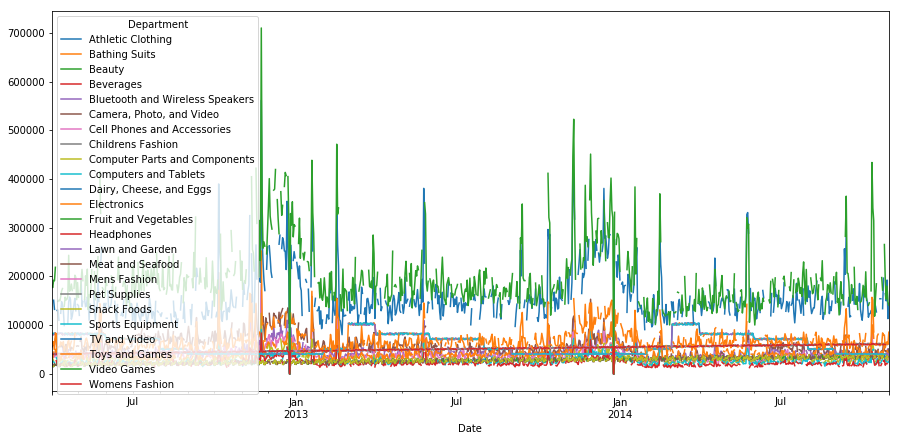

In [64]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack(), aka pivot the inner level of multilevel row index to the column
# This groupby really just creates huierarchical labels, 
# since there is only one value per dept per day, so there is no mean. (I think)
d.groupby([date_col,series_id]).mean()[target].unstack().plot(ax=ax)

In [28]:
def fill_missing_dates(group):
    '''
    Reindex a group series with a new date range
    '''
    date_range = pd.date_range(group.index.min(), group.index.max(), freq='D')
    group = group.reindex(date_range)
    return group

In [73]:
# training = d.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()

# Fill in the missing days for each group (will be NaNs)
training = d.set_index(date_col).groupby(series_id).apply(fill_missing_dates)
# d.groupby([series_id]).mean()
# training.unstack(level=0)
training

Department    Sales  Department_Size  \
Department                                                                  
Athletic Clothing 2012-04-01  Athletic Clothing  80874.0           2060.0   
                  2012-04-02  Athletic Clothing  80532.0           2060.0   
                  2012-04-03  Athletic Clothing  82474.0           2060.0   
                  2012-04-04  Athletic Clothing  83639.0           2060.0   
                  2012-04-05  Athletic Clothing  81763.0           2060.0   
                  2012-04-06  Athletic Clothing  81082.0           2060.0   
                  2012-04-07  Athletic Clothing  82190.0           2060.0   
                  2012-04-08                NaN      NaN              NaN   
                  2012-04-09  Athletic Clothing  80984.0           2060.0   
                  2012-04-10                NaN      NaN              NaN   
                  2012-04-11  Athletic Clothing  83559.0           2060.0   
                  2012-04-12  Athletic Clothing  83537.0           2060.0   
                  2012-04-13  Athletic Clothing  83333.0           2060.0   
                  2012-04-14                NaN      NaN              NaN   
                  2012-04-15  Athletic Clothing  80307.0           2060.0   
                  2012-04-16  Athletic Clothing  82676.0           2060.0   
                  2012-04-17                NaN      NaN              NaN   
                  2012-04-18  Athletic Clothing  81044.0           2060.0   
                  2012-04-19  Athletic Clothing  83257.0           2060.0   
                  2012-04-20  Athletic Clothing  83652.0           2060.0   
                  2012-04-21  Athletic Clothing  80507.0           2060.0   
                  2012-04-22  Athletic Clothing  82363.0           2060.0   
                  2012-04-23                NaN      NaN              NaN   
                  2012-04-24  Athletic Clothing  83996.0           2060.0   
                  2012-04-25  Athletic Clothing  81496.0           2060.0   
                  2012-04-26  Athletic Clothing  81439.0           2060.0   
                  2012-04-27  Athletic Clothing  82419.0           2060.0   
                  2012-04-28                NaN      NaN              NaN   
                  2012-04-29                NaN      NaN              NaN   
                  2012-04-30  Athletic Clothing  80137.0           2060.0   
...                                         ...      ...              ...   
Womens Fashion    2014-10-02     Womens Fashion  61476.0           1910.0   
                  2014-10-03     Womens Fashion  60136.0           1910.0   
                  2014-10-04                NaN      NaN              NaN   
                  2014-10-05     Womens Fashion  59886.0           1910.0   
                  2014-10-06     Womens Fashion  60119.0           1910.0   
                  2014-10-07     Womens Fashion  60185.0           1910.0   
                  2014-10-08                NaN      NaN              NaN   
                  2014-10-09     Womens Fashion  59986.0           1910.0   
                  2014-10-10     Womens Fashion  60574.0           1910.0   
                  2014-10-11     Womens Fashion  60261.0           1910.0   
                  2014-10-12     Womens Fashion  62684.0           1910.0   
                  2014-10-13     Womens Fashion  60745.0           1910.0   
                  2014-10-14     Womens Fashion  62041.0           1910.0   
                  2014-10-15     Womens Fashion  60602.0           1910.0   
                  2014-10-16                NaN      NaN              NaN   
                  2014-10-17     Womens Fashion  62127.0           1910.0   
                  2014-10-18     Womens Fashion  60537.0           1910.0   
                  2014-10-19                NaN      NaN              NaN   
                  2014-10-20     Womens Fashion  60099.0           1910.0   
                  2014-10-21     

In [74]:
# Set the name of the rows axis so the date index has the name 'Date', 
# drop the department name, and reset the index to mode the date to column
training = training.rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()
training

,Department,Date,Sales,Department_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Athletic Clothing,2012-04-01,80874.0,2060.0,31.0,0.760756,371.0,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
1,Athletic Clothing,2012-04-02,80532.0,2060.0,33.0,0.781784,308.0,5.835458,In Store Credit Card Signup Discount; Spring P...,No,0.028092,NaN,NaN,NaN
2,Athletic Clothing,2012-04-03,82474.0,2060.0,65.0,0.444975,386.0,6.180215,In Store Credit Card Signup Discount; Spring P...,No,0.029847,NaN,NaN,NaN
3,Athletic Clothing,2012-04-04,83639.0,2060.0,67.0,0.836780,364.0,7.149818,In Store Credit Card Signup Discount; Spring P...,No,0.028064,NaN,NaN,NaN
4,Athletic Clothing,2012-04-05,81763.0,2060.0,65.0,0.991318,567.0,10.323724,In Store Credit Card Signup Discount; Spring P...,No,0.030224,NaN,NaN,NaN
5,Athletic Clothing,2012-04-06,81082.0,2060.0,65.0,0.605925,709.0,8.392068,In Store Credit Card Signup Discount; Spring P...,No,0.030482,NaN,4300.0,NaN
6,Athletic Clothing,2012-04-07,82190.0,2060.0,68.0,0.342021,491.0,9.113846,In Store Credit Card Signup Discount; Spring P...,No,0.038417,NaN,NaN,NaN
7,Athletic Clothing,2012-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Athletic Clothing,2012-04-09,80984.0,2060.0,45.0,0.059526,223.0,10.039990,In Store Credit Card Signup Discount; Spring P...,No,0.037888,NaN,NaN,NaN
9,Athletic Clothing,2012-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
training.to_csv('with_filled_in_Dates.csv', index=False)

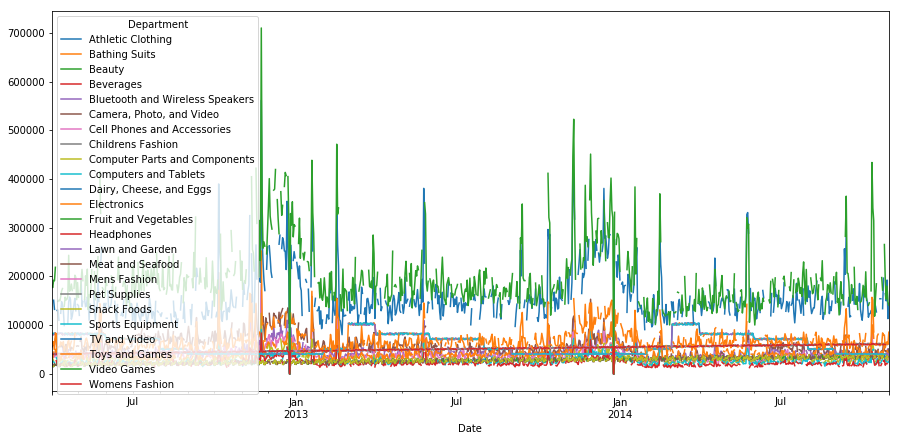

In [76]:
# plot data
fig, ax = plt.subplots(figsize=(15,7))
# use unstack() - it's not visually clear to me that there's a difference between this and the plot above
training.groupby([date_col,series_id]).mean()[target].unstack().plot(ax=ax)

In [77]:
# check if the above worked
training.groupby(series_id)[date_col].diff().value_counts()

1 days    22614
Name: Date, dtype: int64

In [79]:
# counts
training[target].isna().sum(), training.shape, training[date_col].max()

(4638, (22638, 14), Timestamp('2014-10-31 00:00:00'))

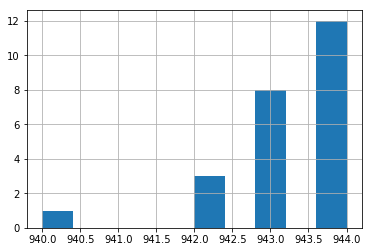

In [81]:
# Check to see if your series are similar lengths - they all are around 940
training.groupby(series_id).count()[date_col].hist()
plt.show()

In [26]:
training[series_id].value_counts()

Childrens Fashion                  944
Athletic Clothing                  944
Camera, Photo, and Video           944
Computers and Tablets              944
Video Games                        944
Toys and Games                     944
TV and Video                       944
Dairy, Cheese, and Eggs            944
Beverages                          944
Womens Fashion                     944
Meat and Seafood                   944
Mens Fashion                       944
Bluetooth and Wireless Speakers    943
Electronics                        943
Fruit and Vegetables               943
Beauty                             943
Bathing Suits                      943
Sports Equipment                   943
Headphones                         943
Computer Parts and Components      943
Cell Phones and Accessories        942
Snack Foods                        942
Lawn and Garden                    942
Pet Supplies                       940
Name: Department, dtype: int64

In [27]:
# get max time step for each series
t = training.copy()
t['diff'] = d.groupby(series_id)['Date'].diff().dt.days
t.groupby(series_id)['diff'].max()

Department
Athletic Clothing                  4.0
Bathing Suits                      7.0
Beauty                             5.0
Beverages                          4.0
Bluetooth and Wireless Speakers    5.0
Camera, Photo, and Video           5.0
Cell Phones and Accessories        4.0
Childrens Fashion                  6.0
Computer Parts and Components      6.0
Computers and Tablets              4.0
Dairy, Cheese, and Eggs            4.0
Electronics                        5.0
Fruit and Vegetables               4.0
Headphones                         4.0
Lawn and Garden                    6.0
Meat and Seafood                   6.0
Mens Fashion                       4.0
Pet Supplies                       4.0
Snack Foods                        4.0
Sports Equipment                   3.0
TV and Video                       NaN
Toys and Games                     NaN
Video Games                        NaN
Womens Fashion                     NaN
Name: diff, dtype: float64

In [28]:
training




,Department,Date,Sales,Department_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Athletic Clothing,2012-04-01,80874.0,2060.0,31.0,0.760756,371.0,8.660916,In Store Credit Card Signup Discount; Spring P...,No,0.029439,0.780263,NaN,-0.025092
1,Athletic Clothing,2012-04-02,80532.0,2060.0,33.0,0.781784,308.0,5.835458,In Store Credit Card Signup Discount; Spring P...,No,0.028092,NaN,NaN,NaN
2,Athletic Clothing,2012-04-03,82474.0,2060.0,65.0,0.444975,386.0,6.180215,In Store Credit Card Signup Discount; Spring P...,No,0.029847,NaN,NaN,NaN
3,Athletic Clothing,2012-04-04,83639.0,2060.0,67.0,0.836780,364.0,7.149818,In Store Credit Card Signup Discount; Spring P...,No,0.028064,NaN,NaN,NaN
4,Athletic Clothing,2012-04-05,81763.0,2060.0,65.0,0.991318,567.0,10.323724,In Store Credit Card Signup Discount; Spring P...,No,0.030224,NaN,NaN,NaN
5,Athletic Clothing,2012-04-06,81082.0,2060.0,65.0,0.605925,709.0,8.392068,In Store Credit Card Signup Discount; Spring P...,No,0.030482,NaN,4300.0,NaN
6,Athletic Clothing,2012-04-07,82190.0,2060.0,68.0,0.342021,491.0,9.113846,In Store Credit Card Signup Discount; Spring P...,No,0.038417,NaN,NaN,NaN
7,Athletic Clothing,2012-04-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Athletic Clothing,2012-04-09,80984.0,2060.0,45.0,0.059526,223.0,10.039990,In Store Credit Card Signup Discount; Spring P...,No,0.037888,NaN,NaN,NaN
9,Athletic Clothing,2012-04-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#define function to build clusters    
def build_clusters(data, corr_cut = .7):

    s = pd.concat([data[[date_col]], data.pivot(columns=series_id, values=target)],axis=1)
    s = s.groupby(date_col).first()
    
    s_corr = s.corr()
    max_col = 0
    max_cluster = 0
    for col in s_corr.columns:
        num_cor = np.shape(s_corr.columns[s_corr.loc[col,:] > corr_cut])[0]
        if num_cor > max_cluster:
            max_cluster=num_cor
            max_col = col
    clus_vals = np.array(s_corr.loc[max_col,:][s_corr.loc[max_col,:] > corr_cut].index)
    data_c1 = data[data[series_id].isin(clus_vals)]
    data_rem1 = data[~data[series_id].isin(clus_vals)]
    
    
    # . + ' Starting unique series')
    var1 = data[series_id].nunique()
    print (str(var1)  + " Starting unique series")
    var2 = data_rem1[series_id].nunique()
    print (str(var2) + ' Remaining series after removing cluster')
    print ('Biggest Cluster: ' +  str(max_col) + ' with ' + str(max_cluster) + " Cluster Members: " + str(clus_vals))
    var3 = data_rem1[series_id].unique()
    print ("Remaining Series: " + str(var3))
    #print (data_rem1[series_id].unique())
        
    plt.matshow(s_corr)
    plt.show()
    

    return data_c1, data_rem1


24 Starting unique series
19 Remaining series after removing cluster
Biggest Cluster: Beauty with 5 Cluster Members: ['Beauty' 'Childrens Fashion' 'Mens Fashion' 'Pet Supplies'
 'Womens Fashion']
Remaining Series: ['Athletic Clothing' 'Beverages' 'Camera, Photo, and Video'
 'Computer Parts and Components' 'Computers and Tablets'
 'Dairy, Cheese, and Eggs' 'Electronics' 'Meat and Seafood' 'TV and Video'
 'Toys and Games' 'Video Games' 'Bathing Suits' 'Fruit and Vegetables'
 'Sports Equipment' 'Snack Foods' 'Bluetooth and Wireless Speakers'
 'Lawn and Garden' 'Headphones' 'Cell Phones and Accessories']


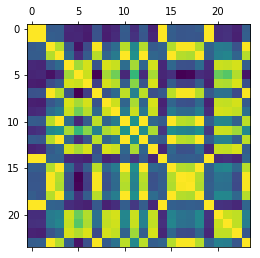

In [30]:
dc1, dr1= build_clusters(d, corr_cut = .95)

19 Starting unique series
9 Remaining series after removing cluster
Biggest Cluster: Bluetooth and Wireless Speakers with 10 Cluster Members: ['Bluetooth and Wireless Speakers' 'Camera, Photo, and Video'
 'Cell Phones and Accessories' 'Computer Parts and Components'
 'Computers and Tablets' 'Electronics' 'Headphones' 'TV and Video'
 'Toys and Games' 'Video Games']
Remaining Series: ['Athletic Clothing' 'Beverages' 'Dairy, Cheese, and Eggs'
 'Meat and Seafood' 'Bathing Suits' 'Fruit and Vegetables'
 'Sports Equipment' 'Snack Foods' 'Lawn and Garden']


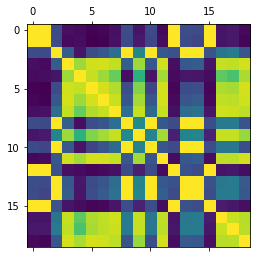

In [31]:
dc2, dr2 = build_clusters(dr1, corr_cut = .80)

9 Starting unique series
4 Remaining series after removing cluster
Biggest Cluster: Beverages with 5 Cluster Members: ['Beverages' 'Dairy, Cheese, and Eggs' 'Fruit and Vegetables'
 'Meat and Seafood' 'Snack Foods']
Remaining Series: ['Athletic Clothing' 'Bathing Suits' 'Sports Equipment' 'Lawn and Garden']


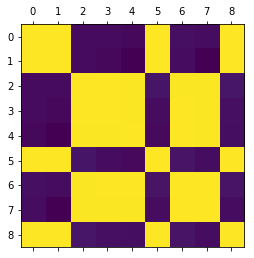

In [32]:
dc3, dr3 = build_clusters(dr2, corr_cut = .60)

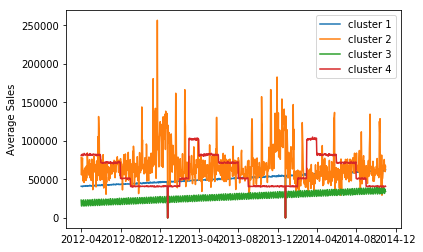

In [33]:
plt.plot(dc1.groupby(date_col).mean()[target], label='cluster 1')
plt.plot(dc2.groupby(date_col).mean()[target], label='cluster 2')
plt.plot(dc3.groupby(date_col).mean()[target], label='cluster 3')
plt.plot(dr3.groupby(date_col).mean()[target], label='cluster 4')


plt.ylabel('Average ' + target)
plt.legend()
plt.show()

In [34]:
dc1.to_csv('cluster_1of4.csv', index=False)
dc2.to_csv('cluster_2of4.csv', index=False)
dc3.to_csv('clustedc30f4.csv', index=False)
dr3.to_csv('cluster_4of4.csv', index=False)


In [35]:
#Cluster 1 wdc1th filled in dates
Cluster1= dc1.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()


In [36]:
Cluster1.to_csv('cluster_1_filledin.csv', index=False)


In [37]:
#Cluster 2 wdc1th filled in dates
Cluster2= dc2.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()

In [38]:
Cluster2.to_csv('cluster_2_filledin.csv', index=False)


In [39]:
#Cluster 3 wdc1th filled in dates
Cluster3= dc3.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()

In [40]:
Cluster3.to_csv('cluster_3_filledin.csv', index=False)


In [41]:
#Cluster 4 wdc1th filled in dates
Cluster4= dr3.set_index(date_col).groupby(series_id).apply(fill_missing_dates).rename_axis((series_id,date_col)).drop(series_id, axis=1).reset_index()

In [42]:
Cluster4.to_csv('cluster_4_filledin.csv', index=False)
